In [14]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


# import xtrack as xt
# import xobjects as xo
# import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm








beta_rel = 0.305
#beta_rel = 0.106

gamma = 1.050
#gamma = 1.006


I=2.4
L = 1.5 # m cooler length
r_beam=25*1e-3

mass0=938.27208816*1e6 #ev/c^2

T_perp = 100e-3 # <E> [eV] = kb*T
T_l =  1e-3 # <E> [eV]
B = 0.060 # T for AD
B_ratio=1e-10
Z=1


c=299792458.0

p0c = mass0*beta_rel*gamma #eV/c



length = 182.43280000000 #m
T = length/(c*beta_rel)
s_per_turn = T





beta_x=10 
beta_y=4

disp_x=0.12
#disp_x=0

arc=dtk.LinearTransferMatrix(Q_x=5.44, Q_y=5.42,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=disp_x,disp_x_1=disp_x,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0
                                           
                 )

Parameters: $I=2.4 A, B=0.060 T, \beta_x=10 m,\beta_y=4,D_x=0.12 m T_\perp=100meV,T_\parallel=1meV,\epsilon_{x}=35*1e-6,\epsilon_{y}=35*1e-6,dp/p=1e-3$

In [15]:
num_particles=1
#old
emittance=35*1e-6 #inital emittance
delta=1e-3

# #1_sigma
# emittance1=5*1e-6 #inital emittance
# delta1=5e-4

# #2_sigma
# emittance=emittance2
# delta=delta1


x_init=np.sqrt(beta_x*emittance)
y_init=np.sqrt(beta_y*emittance)

dtk_particle = dtk.TestParticles(
        
        mass0=mass0,
        p0c=p0c,
        x=x_init,
        px=0,
        y=0,
        py=0,
        delta=0,
        zeta=0)

dtk_particle_copy_old=dtk_particle.copy()


dtk_cooler = dtk.elements.ElectronCooler(current=I,length=L,r_beam=r_beam,
                                         T_perp=T_perp,T_l=T_l,
                                         B=B,B_ratio=1e-4,
                                         Neutralisation_space_charge=0)

       


num_turns=int(3*1e7)
num_turns=int(1*1e7)
step=100

# initialize arrays
x = []
px = []
delta =[]
action_x = []



for i in tqdm(range(num_turns)):
    if i % step == 0:
        x.append(dtk_particle.x)
        px.append(dtk_particle.px)
        delta.append(dtk_particle.delta)
   
        # calculate action in horizontal plane
        action_x_temp = (dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2)
        action_x.append(action_x_temp)
       
    
        

    arc.track(dtk_particle)
    dtk_cooler.track(dtk_particle)
    

# convert arrays to numpy arrays
x = np.array(x)
px = np.array(px)
action_x = np.array(action_x)
delta = np.array(delta)



time = np.arange(0, num_turns, step) * s_per_turn



100%|██████████| 10000000/10000000 [09:24<00:00, 17719.91it/s]


/tmp/pkruyt/ipykernel_25169/1635877437.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(time,delta/delta[0],label='delta')


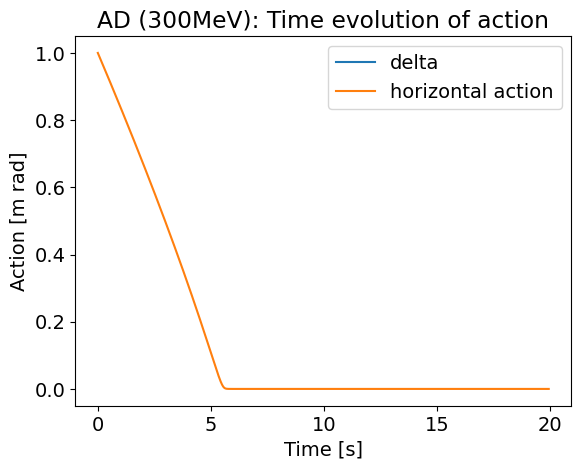

In [16]:
# Plot the horizontal action versus time
plt.figure()
plt.plot(time,delta/delta[0],label='delta')
plt.plot(time,action_x/action_x[0],label='horizontal action')
plt.xlabel('Time [s]')
plt.ylabel('Action [m rad]')
plt.title('AD (300MeV): Time evolution of action')
plt.legend()
plt.ticklabel_format(useOffset=False)



In [17]:
#np.save("ipac/t.npy", time)

#np.save("ipac/x_b_ratio=0.npy", action_x)
#np.save("ipac/delta_b_ratio=0.npy", delta)

# np.save("ipac/x_b_ratio=1e-4.npy", action_x)
# np.save("ipac/delta_b_ratio=1e-4.npy", delta)

#np.save("ipac/x_b_ratio=1e-3.npy", action_x)
#np.save("ipac/delta_b_ratio=1e-3.npy", delta)

##################################################################################
#Space charge

#np.save("ipac/sc_x_b_ratio=1e-3.npy", action_x)
#np.save("ipac/sc_delta_b_ratio=1e-3.npy", delta)

#np.save("ipac/sc_x_b_ratio=1e-4.npy", action_x)
#np.save("ipac/sc_delta_b_ratio=1e-4.npy", delta)

###################################################################################
#No dispersion

#np.save("ipac/no_dispersion/sc_x_b_ratio=1e-3.npy", action_x)
#np.save("ipac/no_dispersion/sc_delta_b_ratio=1e-3.npy", delta)

#np.save("ipac/no_dispersion/sc_x_b_ratio=1e-4.npy", action_x)
#np.save("ipac/no_dispersion/sc_delta_b_ratio=1e-4.npy", delta)


###################################################################################
# 1 sigma

#np.save("ipac/1sigma/sc_x_b_ratio=0.npy", action_x)
#np.save("ipac/1sigma/sc_delta_b_ratio=0.npy", delta)

#np.save("ipac/1sigma/sc_x_b_ratio=1e-3.npy", action_x)
#np.save("ipac/1sigma/sc_delta_b_ratio=1e-3.npy", delta)

#np.save("ipac/1sigma/sc_x_b_ratio=1e-4.npy", action_x)
#np.save("ipac/1sigma/sc_delta_b_ratio=1e-4.npy", delta)

###################################################################################
# 1 sigma no sc

#np.save("ipac/no_sc//t.npy", time)
#np.save("ipac/no_sc/x_x1_d1.npy", action_x)
#np.save("ipac/no_sc/d_x1_d1.npy", delta)

#np.save("ipac/no_sc/x_x1_d2.npy", action_x)
#np.save("ipac/no_sc/d_x1_d2.npy", delta)

#np.save("ipac/no_sc/x_x2_d1.npy", action_x)
#np.save("ipac/no_sc/d_x2_d1.npy", delta)

# np.save("ipac/no_sc/x_x2_d2.npy", action_x)
# np.save("ipac/no_sc/d_x2_d2.npy", delta)

###################################################################################
# 1 sigma no sc

#np.save("ipac/no_sc/x_x1_d2.npy", action_x)
#np.save("ipac/no_sc/d_x1_d2.npy", delta)

#np.save("ipac/no_sc/x_x2_d1.npy", action_x)
#np.save("ipac/no_sc/d_x2_d1.npy", delta)

# np.save("ipac/no_sc/x_x2_d2.npy", action_x)
# np.save("ipac/no_sc/d_x2_d2.npy", delta)

###################################################################################
# x+y no sc

#np.save("ipac/x+y(no_sc)//t.npy", time)
#np.save("ipac/x+y(no_sc)/x_b_ratio=0.npy", action_x)
#np.save("ipac/x+y(no_sc)/x_b_ratio=1e-3.npy", action_x)
#np.save("ipac/x+y(no_sc)/x_b_ratio=1e-4.npy", action_x)

###################################################################################
# x no sc

#np.save("ipac/x(no_sc)//t.npy", time)
#np.save("ipac/x(no_sc)/x_b_ratio=0.npy", action_x)
#np.save("ipac/x(no_sc)/x_b_ratio=1e-4.npy", action_x)
#np.save("ipac/x(no_sc)/x_b_ratio=1e-3.npy", action_x)


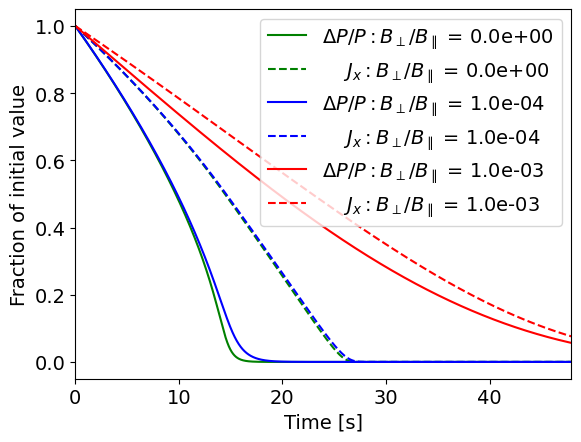

In [18]:
#No space charge
# load the data
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

time = np.load('ipac/t.npy')

x_0 = np.load('ipac/x_b_ratio=0.npy')
delta_0 = np.load('ipac/delta_b_ratio=0.npy')

x_3 = np.load('ipac/x_b_ratio=1e-3.npy')
delta_3 = np.load('ipac/delta_b_ratio=1e-3.npy')

x_4 = np.load('ipac/x_b_ratio=1e-4.npy')
delta_4 = np.load('ipac/delta_b_ratio=1e-4.npy')

# plot the horizontal and vertical action vs time
plt.figure()
plt.plot(time, delta_0/delta_4[0],color='g',linestyle='-'             ,label="$\Delta P/P:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(0))
plt.plot(time, x_0/x_4[0],color='g',linestyle='--'                     , label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(0))
plt.plot(time, delta_4/delta_4[0],color='b',linestyle='-'             ,label="$\Delta P/P:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-4))
plt.plot(time, x_4/x_4[0],color='b',linestyle='--'                     , label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-4))
plt.plot(time, delta_3/delta_3[0],color='r',linestyle='-'               , label="$\Delta P/P:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-3))
plt.plot(time, x_3/x_3[0],color='r',linestyle='--'                     , label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-3))
plt.xlabel('Time [s]')
plt.ylabel('Fraction of initial value')
plt.xlim([0, 0.8*time[-1]])
plt.legend()
plt.ticklabel_format(useOffset=False)
  

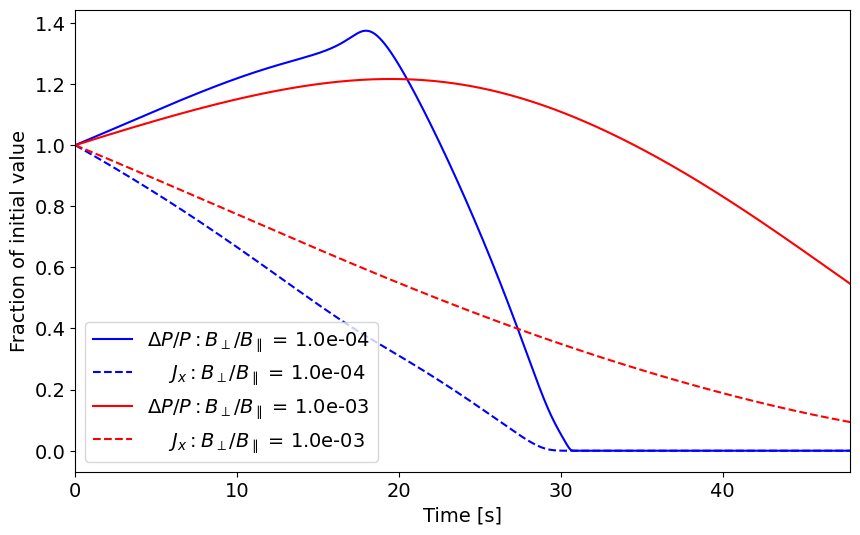

In [19]:
#Space charge
# load the data
time = np.load('ipac/t.npy')



x_3 = np.load('ipac/sc_x_b_ratio=1e-3.npy')
delta_3 = np.load('ipac/sc_delta_b_ratio=1e-3.npy')

x_4 = np.load('ipac/sc_x_b_ratio=1e-4.npy')
delta_4 = np.load('ipac/sc_delta_b_ratio=1e-4.npy')

# plot the horizontal and vertical action vs time
plt.figure(figsize=(10, 6))

plt.plot(time, delta_4/delta_4[0],color='b',linestyle='-'             ,label="$\Delta P/P:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-4))
plt.plot(time, x_4/x_4[0],color='b',linestyle='--'                     , label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-4))
plt.plot(time, delta_3/delta_3[0],color='r',linestyle='-'               , label="$\Delta P/P:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-3))
plt.plot(time, x_3/x_3[0],color='r',linestyle='--'                     , label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-3))
plt.xlabel('Time [s]')
plt.ylabel('Fraction of initial value')
plt.xlim([0, 0.8*time[-1]])
plt.legend()
plt.ticklabel_format(useOffset=False)

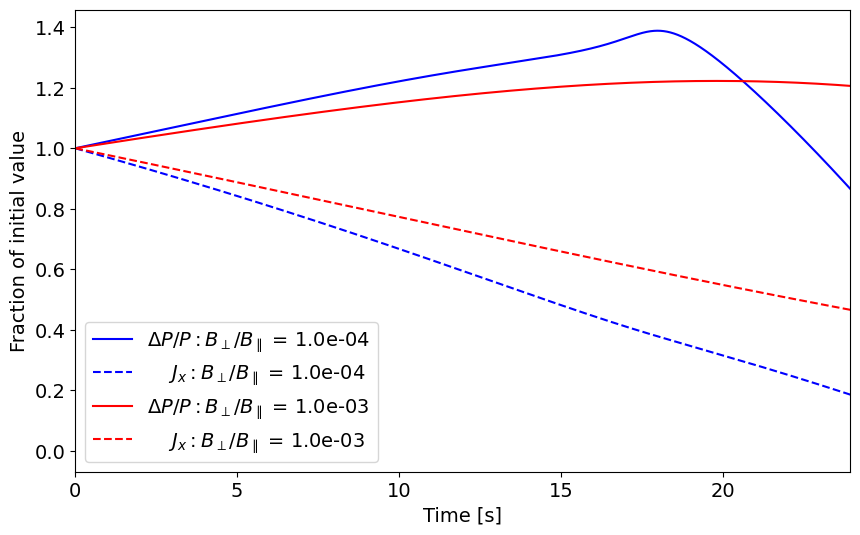

In [20]:
#Space charge 1 sigma
# load the data
time = np.load('ipac/t.npy')

#x_0 = np.load('ipac/no_dispersion/sc_x_b_ratio=0.npy')
#delta_0 = np.load('ipac/no_dispersion/sc_delta_b_ratio=0.npy')

x_3 = np.load('ipac/no_dispersion/sc_x_b_ratio=1e-3.npy')
delta_3 = np.load('ipac/no_dispersion/sc_delta_b_ratio=1e-3.npy')

x_4 = np.load('ipac/no_dispersion/sc_x_b_ratio=1e-4.npy')
delta_4 = np.load('ipac/no_dispersion/sc_delta_b_ratio=1e-4.npy')

# plot the horizontal and vertical action vs time
plt.figure(figsize=(10, 6))
#plt.plot(time, delta_0/delta_0[0],color='g',linestyle='-'             ,label="$\Delta P/P:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(0))
#plt.plot(time, x_0/x_0[0],color='g',linestyle='--'                     , label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(0))

plt.plot(time, delta_4/delta_4[0],color='b',linestyle='-'             ,label="$\Delta P/P:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-4))
plt.plot(time, x_4/x_4[0],color='b',linestyle='--'                     , label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-4))

plt.plot(time, delta_3/delta_3[0],color='r',linestyle='-'               , label="$\Delta P/P:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-3))
plt.plot(time, x_3/x_3[0],color='r',linestyle='--'                     , label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-3))
plt.xlabel('Time [s]')
plt.ylabel('Fraction of initial value')
plt.xlim([0, 0.4*time[-1]])
plt.legend()
plt.ticklabel_format(useOffset=False)

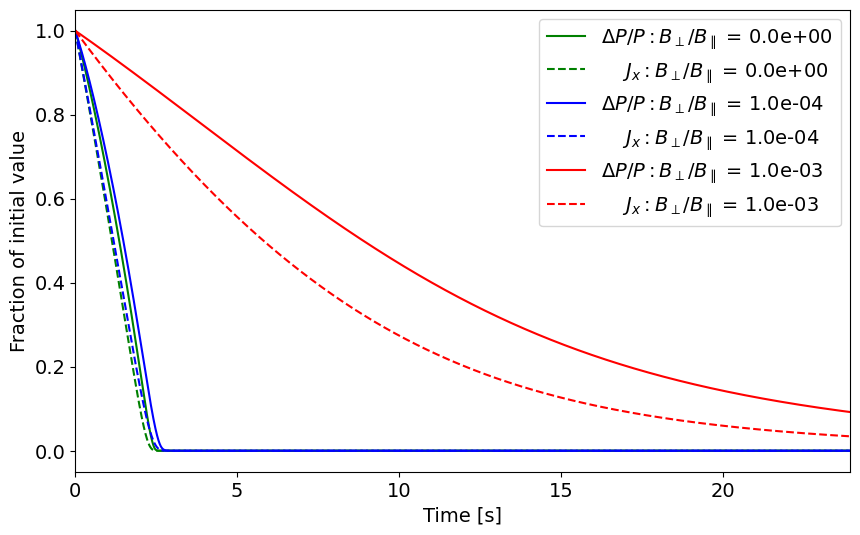

In [21]:
#Space charge 1 sigma
# load the data
time = np.load('ipac/t.npy')

x_0 = np.load('ipac/1sigma/sc_x_b_ratio=0.npy')
delta_0 = np.load('ipac/1sigma/sc_delta_b_ratio=0.npy')

x_3 = np.load('ipac/1sigma/sc_x_b_ratio=1e-3.npy')
delta_3 = np.load('ipac/1sigma/sc_delta_b_ratio=1e-3.npy')

x_4 = np.load('ipac/1sigma/sc_x_b_ratio=1e-4.npy')
delta_4 = np.load('ipac/1sigma/sc_delta_b_ratio=1e-4.npy')

# plot the horizontal and vertical action vs time
plt.figure(figsize=(10, 6))
plt.plot(time, delta_0/delta_0[0],color='g',linestyle='-'             ,label="$\Delta P/P:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(0))
plt.plot(time, x_0/x_0[0],color='g',linestyle='--'                     , label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(0))

plt.plot(time, delta_4/delta_4[0],color='b',linestyle='-'             ,label="$\Delta P/P:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-4))
plt.plot(time, x_4/x_4[0],color='b',linestyle='--'                     , label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-4))

plt.plot(time, delta_3/delta_3[0],color='r',linestyle='-'               , label="$\Delta P/P:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-3))
plt.plot(time, x_3/x_3[0],color='r',linestyle='--'                     , label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-3))
plt.xlabel('Time [s]')
plt.ylabel('Fraction of initial value')
plt.xlim([0, 0.4*time[-1]])
plt.legend()
plt.ticklabel_format(useOffset=False)

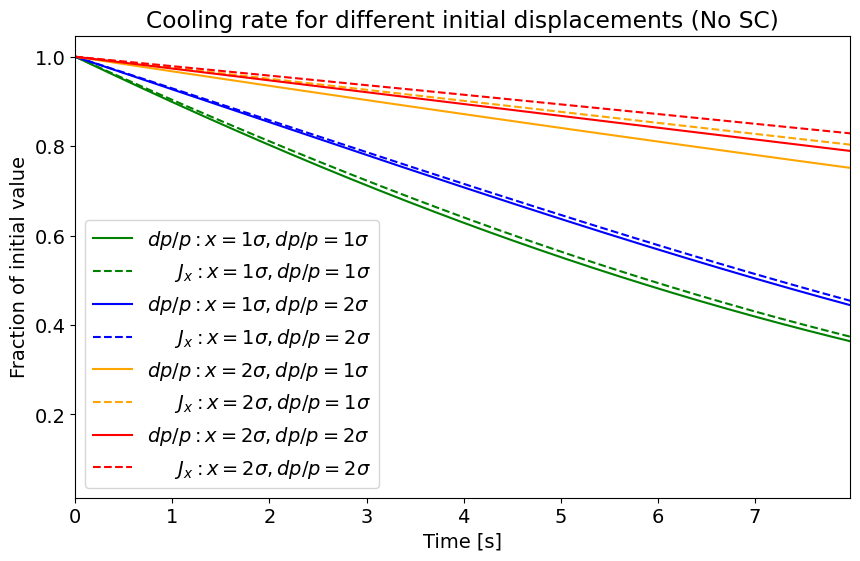

In [22]:
#No space charge vary  sigma
# load the data
time = np.load('ipac/no_sc/t.npy')

x_x1_d1 = np.load("ipac/no_sc/x_x1_d1.npy")
d_x1_d1 = np.load("ipac/no_sc/d_x1_d1.npy")

x_x1_d2 = np.load("ipac/no_sc/x_x1_d2.npy")
d_x1_d2 = np.load("ipac/no_sc/d_x1_d2.npy")

x_x2_d1 = np.load("ipac/no_sc/x_x2_d1.npy")
d_x2_d1 = np.load("ipac/no_sc/d_x2_d1.npy")

x_x2_d2 = np.load("ipac/no_sc/x_x2_d2.npy")
d_x2_d2 = np.load("ipac/no_sc/d_x2_d2.npy")

# plot the horizontal and vertical action vs time
plt.figure(figsize=(10, 6))

plt.plot(time,d_x1_d1/d_x1_d1[0],color='g',linestyle='-',label='$dp/p:x=1 \sigma , dp/p=1 \sigma$')
plt.plot(time,x_x1_d1/x_x1_d1[0],color='g',linestyle='--' ,label='     $J_x:x=1 \sigma , dp/p=1 \sigma$')

plt.plot(time,d_x1_d2/d_x1_d2[0],color='b',linestyle='-' ,label='$dp/p:x=1 \sigma , dp/p=2 \sigma$')
plt.plot(time,x_x1_d2/x_x1_d2[0],color='b',linestyle='--' ,label='     $J_x:x=1 \sigma , dp/p=2 \sigma$')

plt.plot(time,d_x2_d1/d_x2_d1[0],color='orange',linestyle='-' ,label='$dp/p:x=2 \sigma , dp/p=1 \sigma$')
plt.plot(time,x_x2_d1/x_x2_d1[0],color='orange',linestyle='--' ,label='     $J_x:x=2 \sigma , dp/p=1 \sigma$')

plt.plot(time,d_x2_d2/d_x2_d2[0],color='r',linestyle='-' ,label='$dp/p:x=2 \sigma , dp/p=2 \sigma$')
plt.plot(time,x_x2_d2/x_x2_d2[0],color='r',linestyle='--' ,label='     $J_x:x=2 \sigma , dp/p=2 \sigma$')


plt.xlabel('Time [s]')
plt.ylabel('Fraction of initial value')
plt.xlim([0, 0.4*time[-1]])
plt.legend()
plt.title('Cooling rate for different initial displacements (No SC)')
plt.ticklabel_format(useOffset=False)

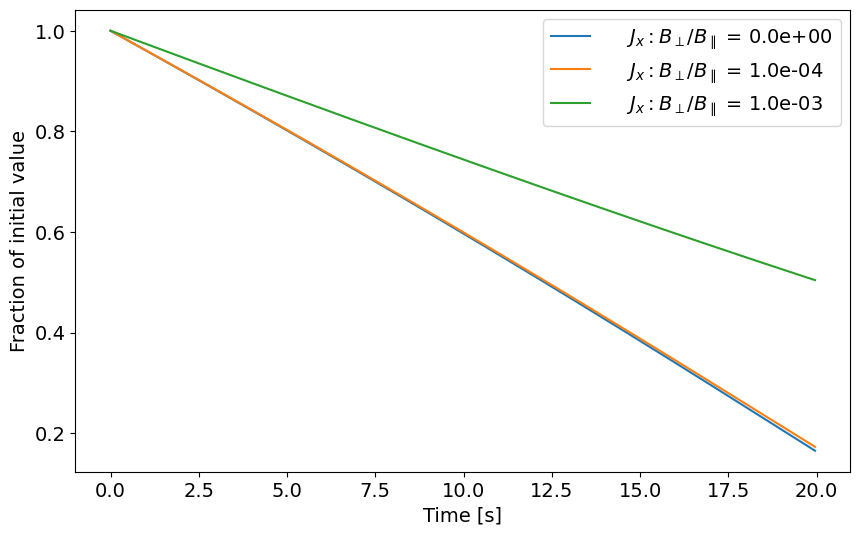

In [23]:


#No space charge vary  sigma
# load the data
time = np.load('ipac/x+y(no_sc)/t.npy')

x0 = np.load("ipac/x+y(no_sc)/x_b_ratio=0.npy")
x3 = np.load("ipac/x+y(no_sc)/x_b_ratio=1e-3.npy")
x4 = np.load("ipac/x+y(no_sc)/x_b_ratio=1e-4.npy")


# plot the horizontal and vertical action vs time
plt.figure(figsize=(10, 6))

plt.plot(time,x0/x0[0], label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(0))
plt.plot(time,x4/x0[0], label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-4))
plt.plot(time,x3/x0[0], label="    $J_x:B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-3))




plt.xlabel('Time [s]')
plt.ylabel('Fraction of initial value')
plt.legend()
#plt.title('Cooling rate for different initial displacements (No SC)')
plt.ticklabel_format(useOffset=False)



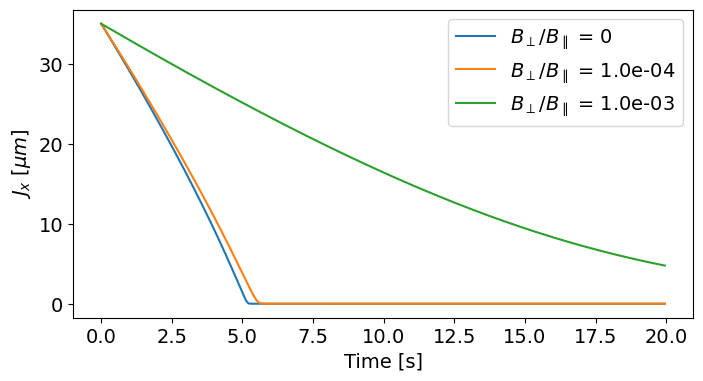

In [24]:
#No space charge vary  sigma
# load the data
time = np.load('ipac/x+y(no_sc)/t.npy')

x0 = np.load("ipac/x(no_sc)/x_b_ratio=0.npy")
x3 = np.load("ipac/x(no_sc)/x_b_ratio=1e-3.npy")
x4 = np.load("ipac/x(no_sc)/x_b_ratio=1e-4.npy")


plt.rcParams.update({'font.size': 14})  # set the default fontsize to 20

# plot the horizontal and vertical action vs time
plt.figure(figsize=(8, 4))

plt.plot(time,x0*1e6, label="$B_{\perp}/B_{\parallel}$" + " = {}".format(0))

plt.plot(time,x4*1e6, label="$B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-4))
plt.plot(time,x3*1e6, label="$B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-3))




plt.xlabel('Time [s]')
plt.ylabel('$J_x$ $[\mu m]$')
plt.legend()
#plt.title('Only x')


plt.ticklabel_format(useOffset=False,style='plain')
